In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer, util

In [2]:
data = pd.read_csv('../../GPT4omini/gpt4omini.csv')
cosines = data.to_dict()

## Define Functions

In [3]:
def cosines_by_image(data_dict, model_name):
    model = SentenceTransformer(model_name)
    embeddings = model.encode(list(data_dict['text'].values()))
    data_dict['embedding'] = embeddings

    # Initialize containers for results
    cosine_sim_results = []

    # Identify unique conditions
    unique_conditions = set(data_dict['condition'].values())

    for condition in unique_conditions:
        # Initialize lists to hold condition-specific embeddings, images, and texts
        condition_embeddings = []
        condition_images = []
        condition_texts = []  # Added to store texts

        for i in range(len(data_dict['condition'])):
            if data_dict['condition'][i] == condition:
                condition_embeddings.append(data_dict['embedding'][i])
                condition_images.append(data_dict['image'][i])
                condition_texts.append(data_dict['text'][i])  # Store text

        # Calculate pairwise cosine similarity for the current condition
        for i in range(len(condition_embeddings)):
            for j in range(i + 1, len(condition_embeddings)):
                # Calculate cosine similarity
                sim = cosine_similarity([condition_embeddings[i]], [condition_embeddings[j]])[0][0]
                
                # Append result with text values
                cosine_sim_results.append({
                    'condition': condition,
                    'image_1': condition_images[i],
                    'image_2': condition_images[j],
                    'text_1': condition_texts[i],  # Add text for image 1
                    'text_2': condition_texts[j],  # Add text for image 2
                    'cosine': sim
                })

    results_df = pd.DataFrame(cosine_sim_results)
    return results_df

In [ ]:
# After calling the function to get results
results_df = cosines_by_image(cosines, 'sentence-transformers/all-mpnet-base-v2')

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

High Similarity Example:
Condition: w1
Text 1: In a bustling city, Maya started a community garden, bringing neighbors together. Each weekend, laughter echoed as they planted seeds and shared recipes. With every sprout, friendships blossomed. Maya’s vision transformed a barren lot into a vibrant oasis, reminding everyone of the power of nature and unity in their lives.
Text 2: In a bustling city, Maya launched a community garden, uniting neighbors through shared soil and laughter. Each seed planted blossomed with hope, mirroring her radiant smile. As fruits ripened, so did friendships, transforming strangers into a family. Maya envisioned a world nourished by love, one garden at a time.
Cosine Similarity: 0.9656


Low Similarity Example:
Condition: m0
Text 1: In a small town, Marcus discovered an ancient map while renovating his grandmother's attic. Intrigued, he embarked on a weekend adventure. The map led him to a hidden waterfall, where he found a forgotten journal filled with tales

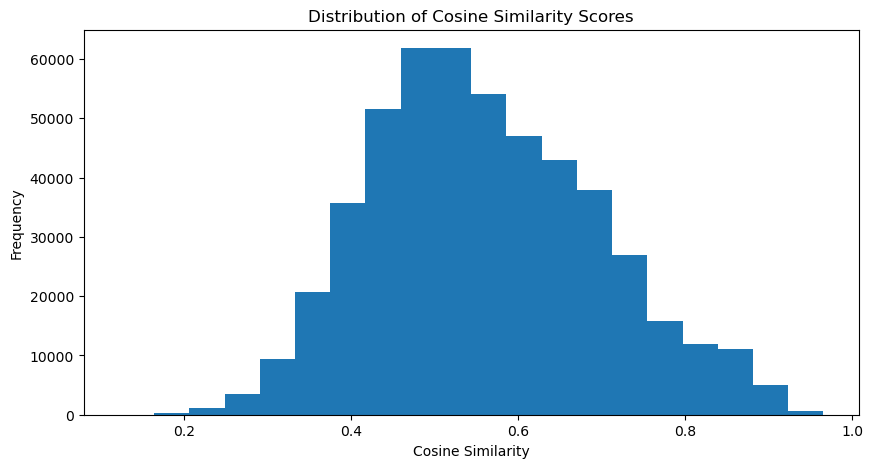


0th percentile (cosine = 0.9656):
Text 1: In a bustling city, Maya started a community garden, bringing neighbors together. Each weekend, laughter echoed as they planted seeds and shared recipes. With every sprout, friendships blossomed. Maya’s vision transformed a barren lot into a vibrant oasis, reminding everyone of the power of nature and unity in their lives.
Text 2: In a bustling city, Maya launched a community garden, uniting neighbors through shared soil and laughter. Each seed planted blossomed with hope, mirroring her radiant smile. As fruits ripened, so did friendships, transforming strangers into a family. Maya envisioned a world nourished by love, one garden at a time.

25th percentile (cosine = 0.6544):
Text 1: In a quiet village, Maya unearthed forgotten stories. With every word, she brought history alive, reuniting families with their lost legacies. One day, she stumbled upon her own family’s past, discovering a treasure of love letters. Inspired, she set out to weave 

In [8]:
import matplotlib.pyplot as plt
# 1. Show distribution of cosine similarities
plt.figure(figsize=(10, 5))
plt.hist(results_df['cosine'], bins=20)
plt.title('Distribution of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.show()

# 2. Sample examples across the similarity spectrum
percentiles = [0, 25, 50, 75, 100]
for p in percentiles:
    idx = int(len(sorted_df) * p / 100)
    idx = min(idx, len(sorted_df) - 1)  # Ensure we don't go out of bounds
    row = sorted_df.iloc[idx]
    print(f"\n{p}th percentile (cosine = {row['cosine']:.4f}):")
    print(f"Text 1: {row['text_1']}")
    print(f"Text 2: {row['text_2']}")